In [18]:
# Week 1 Assignment

# Signal Representation and Sampling

1) Generate a sine wave of frequency 10 Hz with:
Duration = 2seconds and
Sampling rate = 500 Hz.

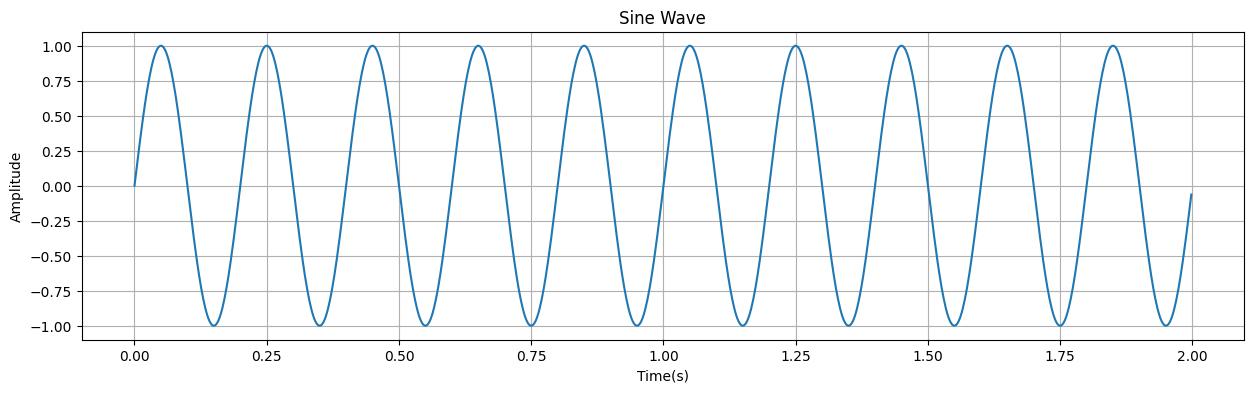

In [19]:
import numpy as np
import matplotlib.pyplot as plt

frequency = 5
duration = 2
sampling_rate = 500

t = np.linspace(0,duration,int(duration * sampling_rate),endpoint=False)
sine_wave = np.sin(2 * np.pi * frequency * t)

plt.figure(figsize=(15, 4))
plt.plot(t,sine_wave)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Sine Wave')
plt.grid(True)
plt.show()

2) Plot the continuous signal and a discretized version sampled at 40 Hz.

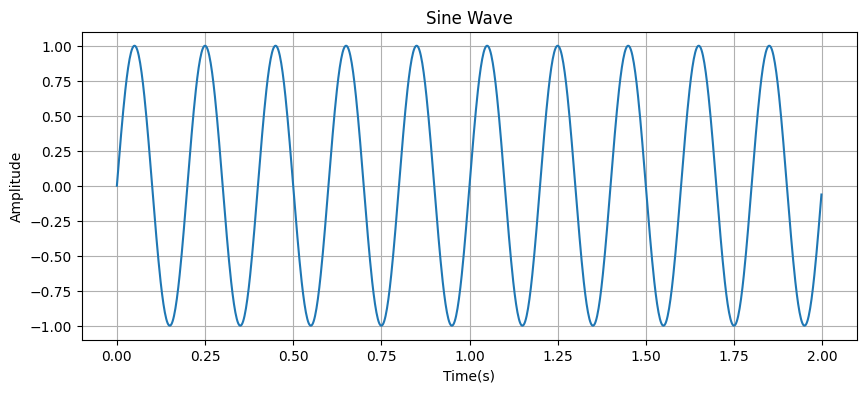

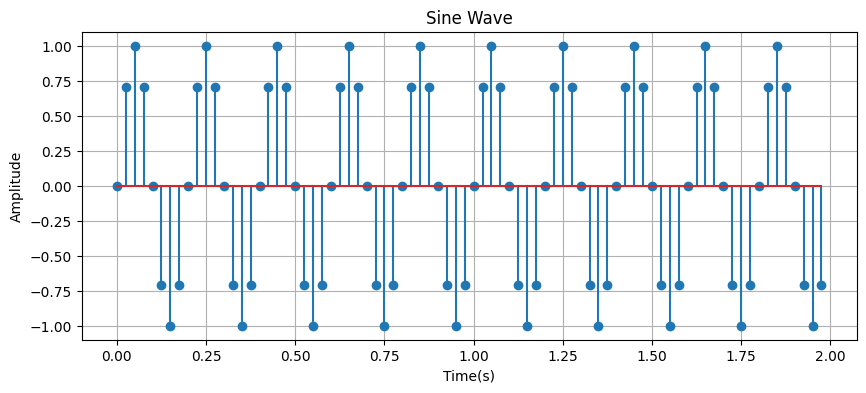

In [20]:
frequency = 5
duration2 = 2
sampling_rate = 500
sam=40
t = np.linspace(0,duration,int(2 * sampling_rate),endpoint=False)
t_dis= np.arange(0,2,1/sam)
sine_wave = np.sin(frequency*2*np.pi*t)
sine_wave_dis = np.sin(frequency*2*np.pi*t_dis)
plt.figure(figsize=(10, 4))
plt.plot(t,sine_wave)
plt.grid(True)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Sine Wave')

# plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.stem(t_dis,sine_wave_dis)
plt.grid(True)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Sine Wave')

# plt.legend()
plt.show()

3) Experiment: Vary the sampling rate (e.g., 20 Hz, 50 Hz, 100 Hz) and observe the effect on the discrete signal.



    Observations:
    - As the sampling rate increases number of points in the discrete sine wave increases. Eventually it almost becoming continuous at certain large sampling rate.
    


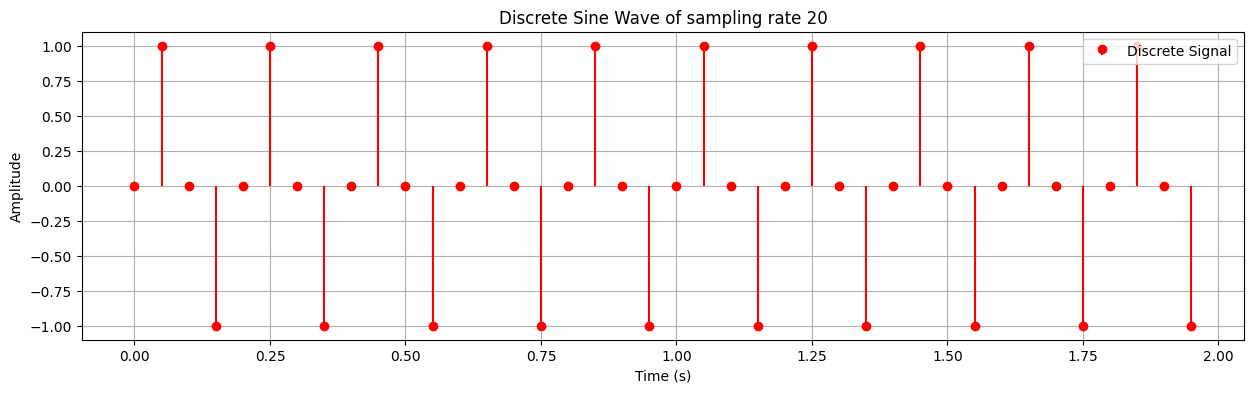

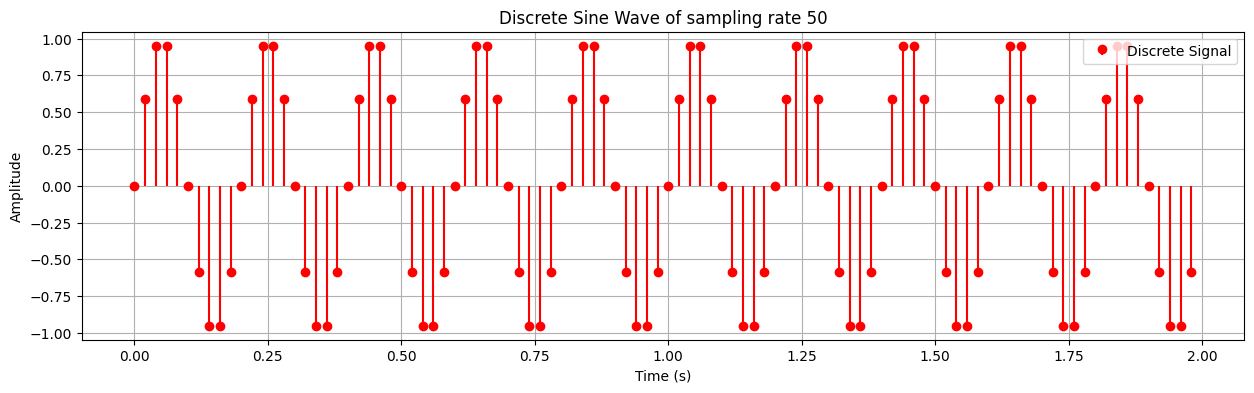

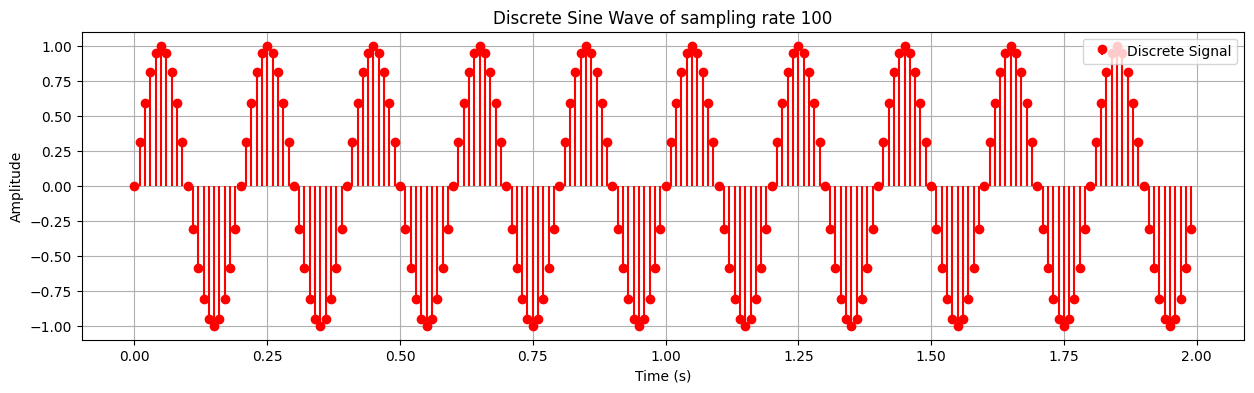

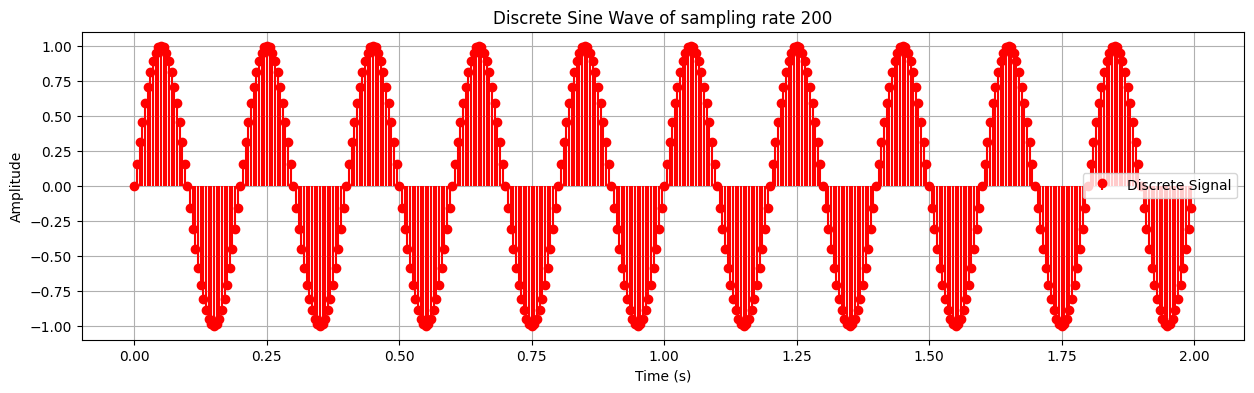

In [21]:
sampling_rate_variable = [20,50,100,200]

for rate in sampling_rate_variable:
    time_continuous = np.linspace(0,duration,int(duration * rate),endpoint=False)
    sine_wave_continuous = np.sin(2 * np.pi * frequency * time_continuous)

    plt.figure(figsize=(15, 4))
    plt.stem(time_continuous, sine_wave_continuous, linefmt='r-', markerfmt='ro', basefmt=" ", label="Discrete Signal")
    plt.title(f"Discrete Sine Wave of sampling rate {rate}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.legend()

print(
    """
    Observations:
    - As the sampling rate increases number of points in the discrete sine wave increases. Eventually it almost becoming continuous at certain large sampling rate.
    """
)

# Fourier Transform and Frequency Domain Analysis

1) Generate a composite signal by summing two sine waves with frequencies 5 Hz and 20 Hz.

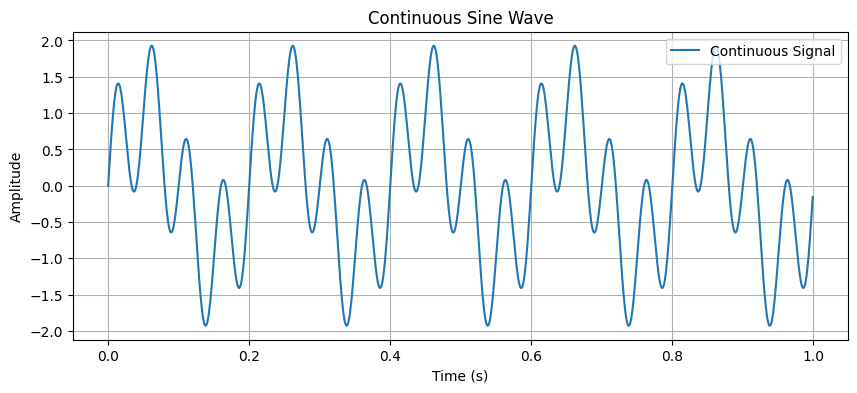

In [22]:
import numpy as np
import matplotlib.pyplot as plt
freq1=5
freq2=20
duration=1
sam_rate=1000
x_axis=np.linspace(0,duration,int(sam_rate*duration),endpoint=False)
y_axis=np.sin(2*(np.pi)*freq1*x_axis)+np.sin(2*(np.pi)*freq2*x_axis)
plt.figure(figsize=(10, 4))
plt.plot(x_axis,y_axis, label="Continuous Signal")
plt.title("Continuous Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

2) Perform the Fourier Transform (FT) on the composite signal,
plot the magnitude spectrum and identify the prominent frequency components.

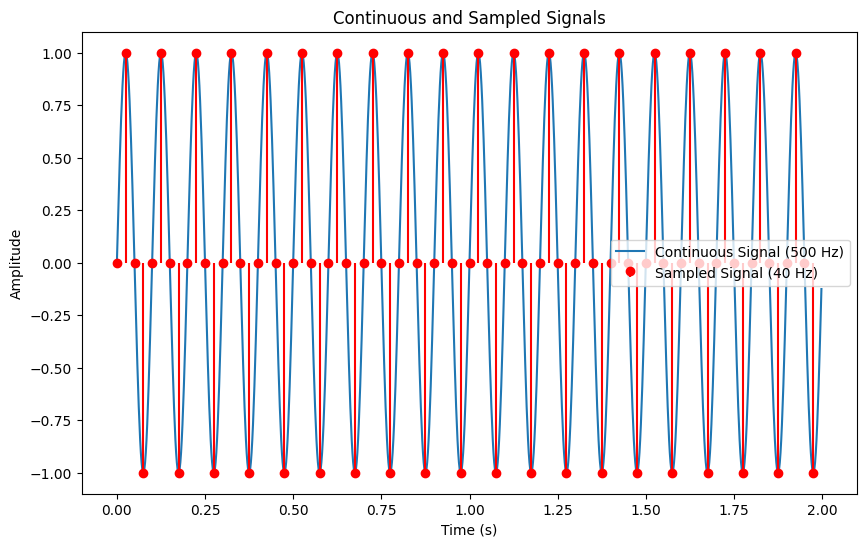

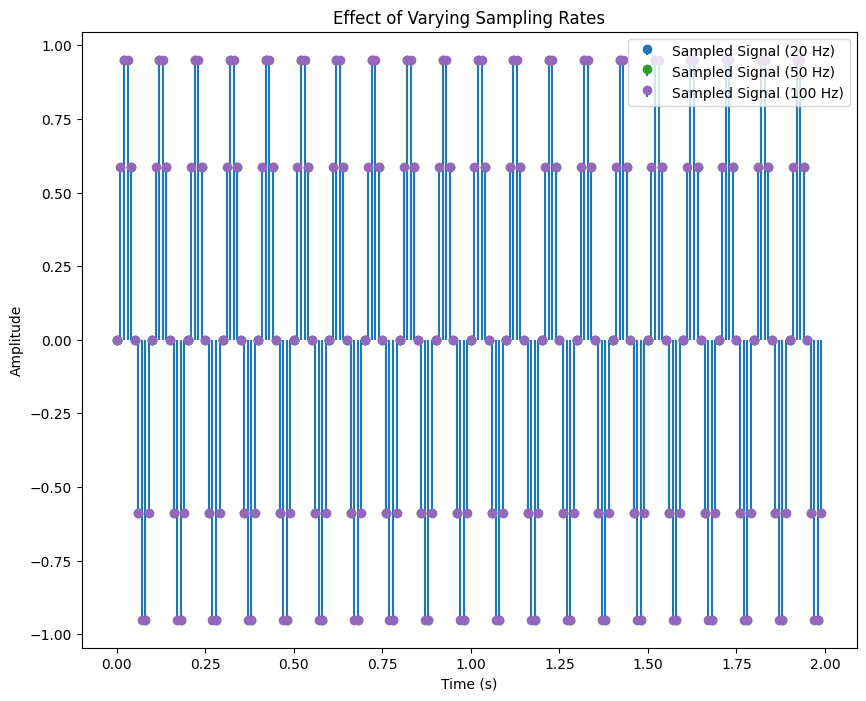

In [23]:
# Prompt 1
fs_500 = 500  # Sampling rate 500 Hz
duration = 2  # Duration in seconds
f_10 = 10  # Frequency in Hz
t_500 = np.linspace(0, duration, int(fs_500 * duration), endpoint=False)
signal_500 = np.sin(2 * np.pi * f_10 * t_500)

# Prompt 2
fs_40 = 40  # Sampling rate 40 Hz
t_40 = np.linspace(0, duration, int(fs_40 * duration), endpoint=False)
signal_40 = np.sin(2 * np.pi * f_10 * t_40)

plt.figure(figsize=(10, 6))
plt.plot(t_500, signal_500, label="Continuous Signal (500 Hz)")
plt.stem(t_40, signal_40, linefmt='r-', markerfmt='ro', basefmt=' ', label="Sampled Signal (40 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Continuous and Sampled Signals")
plt.legend()
plt.show()

# Prompt 3
sampling_rates = [20, 50, 100]
plt.figure(figsize=(10, 8))
for fs in sampling_rates:
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    signal = np.sin(2 * np.pi * f_10 * t)
    plt.stem(t, signal, label=f"Sampled Signal ({fs} Hz)", linefmt='-', markerfmt='o', basefmt=' ')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Effect of Varying Sampling Rates")
plt.legend()
plt.show()

# Audio Signal Analysis

1) Upload like 5 audio but belonging to the same category, like animals, music instruments and stuff (e.g.wav or .mp3) and load it using librosa.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft
import librosa
import librosa.display

bass,sr1 = librosa.load("/Users/sahil/Programs/projects/AUDIONET/assignments/data/bass.mp3", sr=None)
drums,sr2 = librosa.load("/Users/sahil/Programs/projects/AUDIONET/assignments/data/drums.mp3", sr=None)
piano,sr3 = librosa.load("/Users/sahil/Programs/projects/AUDIONET/assignments/data/piano.mp3", sr=None)
guitar,sr4 = librosa.load("/Users/sahil/Programs/projects/AUDIONET/assignments/data/guitar.mp3", sr=None)
trumpet,sr5 = librosa.load("/Users/sahil/Programs/projects/AUDIONET/assignments/data/trumpet.mp3", sr=None) 
list1=[bass,drums,piano,guitar,trumpet]
list2=[sr1,sr2,sr3,sr4,sr5]

2) Plot the waveform of the audio signal.

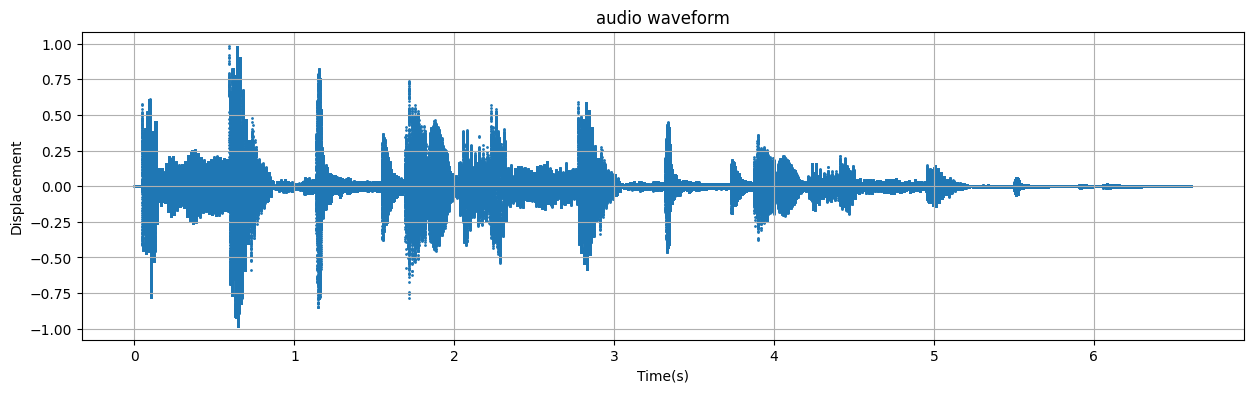

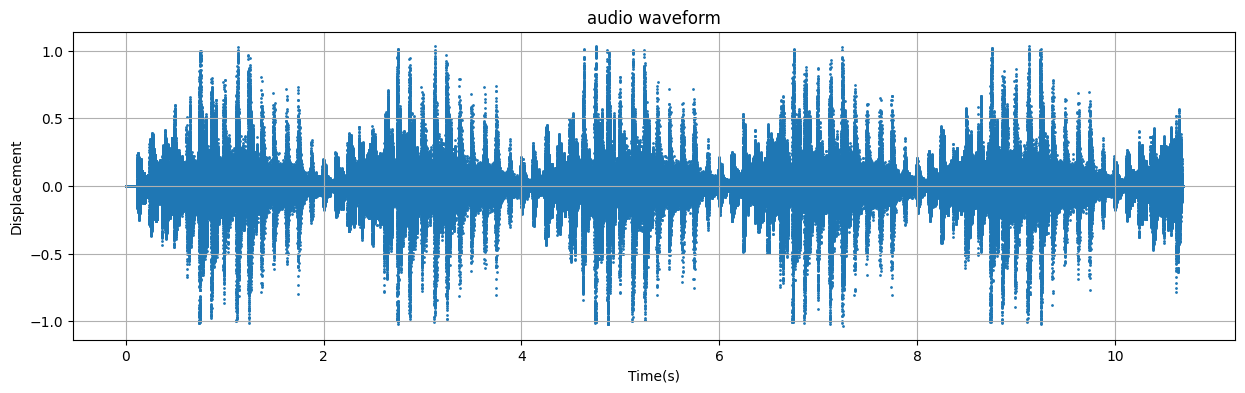

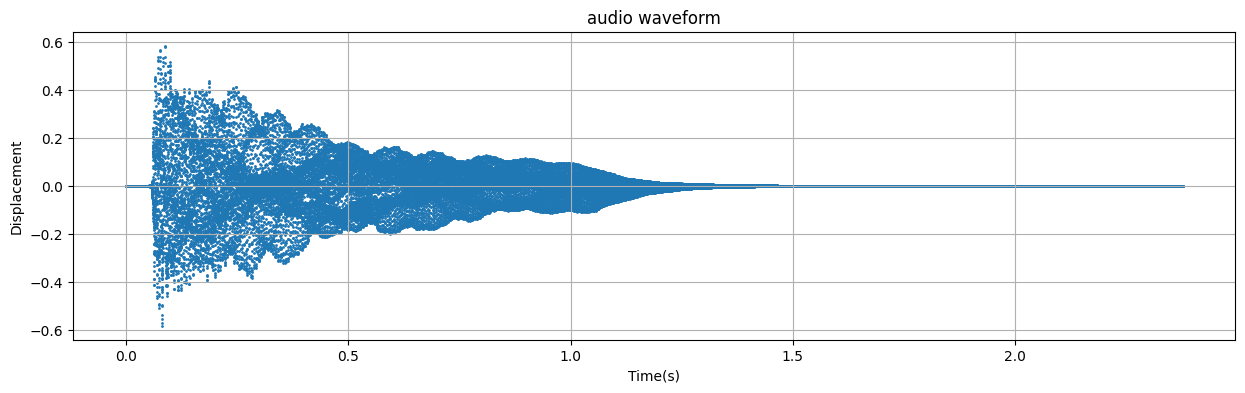

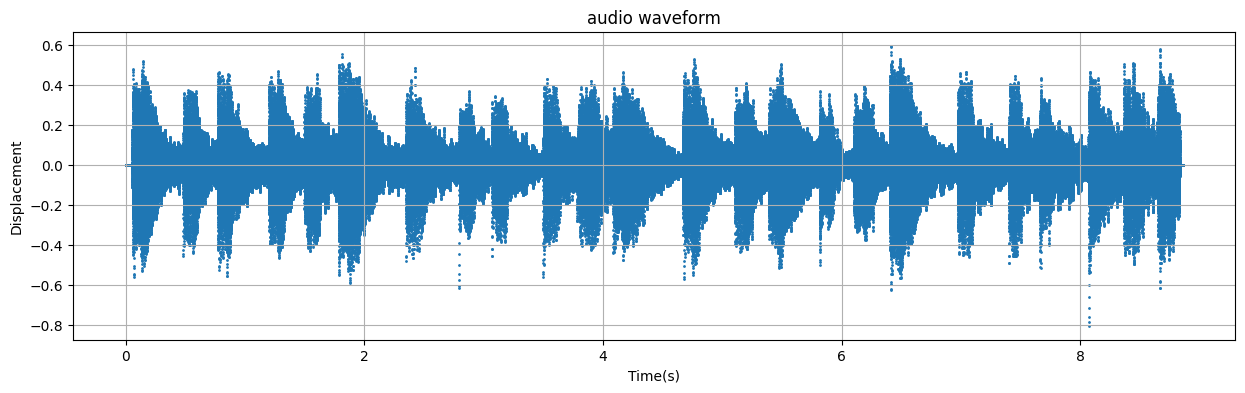

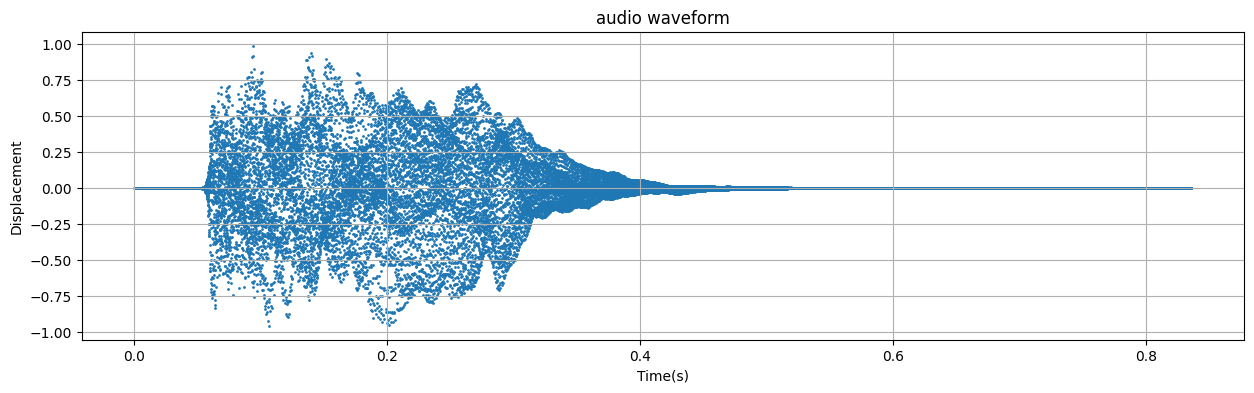

In [25]:
for i in range(len(list1)):
    x=list1[i]
    t=librosa.get_duration(y=x,sr=list2[i])
    time=np.linspace(0,t,len(x))
    plt.figure(figsize=(15,4))
    plt.xlabel("Time(s)")
    plt.ylabel("Displacement")
    plt.title("audio waveform")
    plt.scatter(time,x,s=1)
    plt.grid(True)

3) Perform the Fourier Transform (FT) and plot the magnitude spectrum.

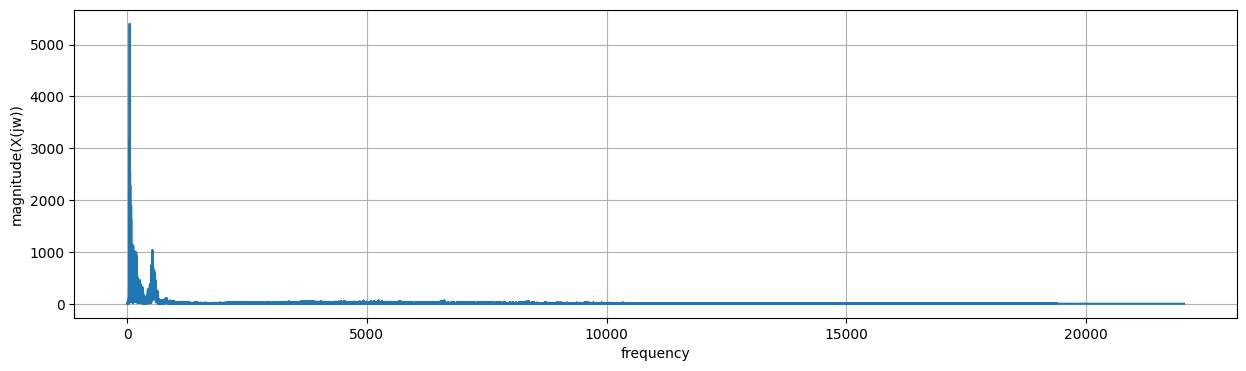

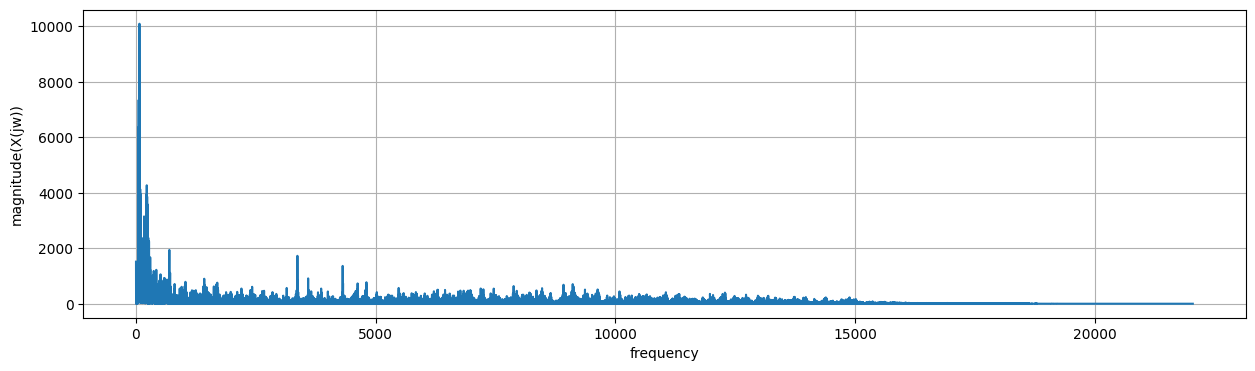

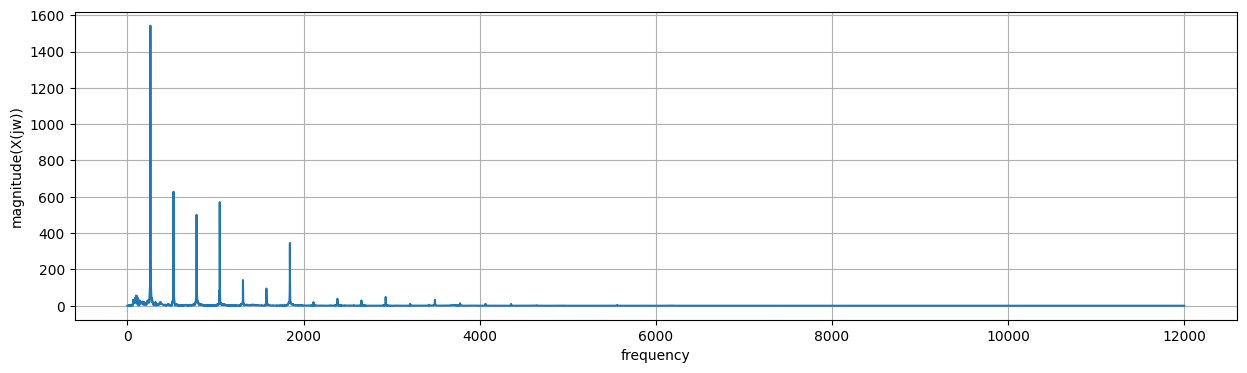

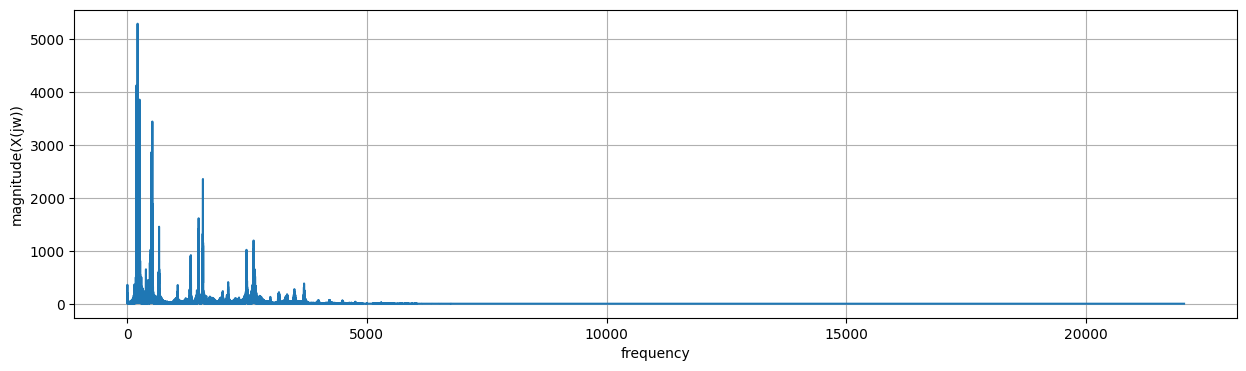

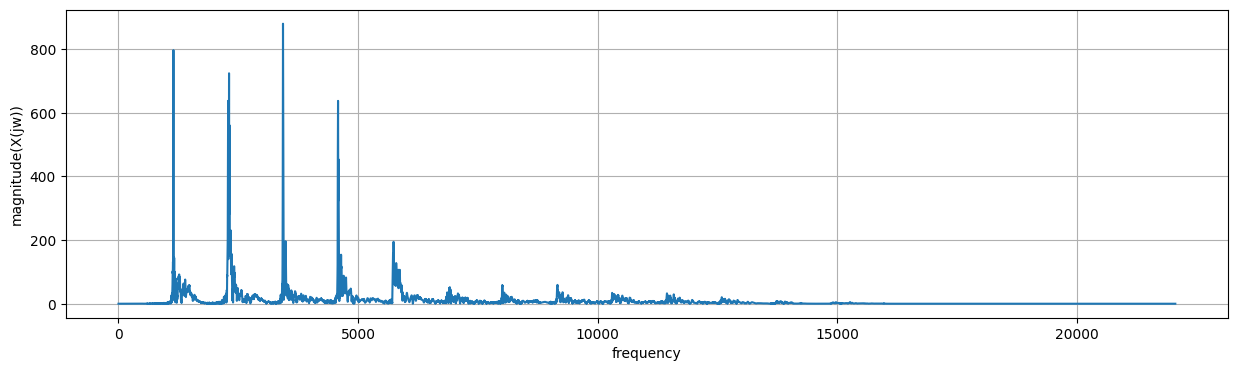

In [26]:
for i in range(len(list1)):
    x=list1[i]
    fft=np.abs(np.fft.fft(x))
    freq_axis=np.fft.fftfreq(len(x),1/(list2[i]))
    fft1=fft[:len(x)//2]
    freq_axis1=freq_axis[:len(freq_axis)//2]
    plt.figure(figsize=(15,4))
    plt.xlabel("frequency")
    plt.ylabel("magnitude(X(jw))")
    plt.plot(freq_axis1,fft1)
    plt.grid(True)

4) Compute and visualize the STFT for the audio signal using scipy.signal.stft.

Experiment with different window sizes (e.g., 256, 1024, 4096).
Discuss the trade-off between time and frequency resolution.

<Figure size 640x480 with 0 Axes>

/var/folders/37/x82lvgr524l4fd08t3g06rl40000gn/T/ipykernel_14292/3664034410.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 20 * np.log10(magnitude), shading='gouraud')  # Log scale for better visualization


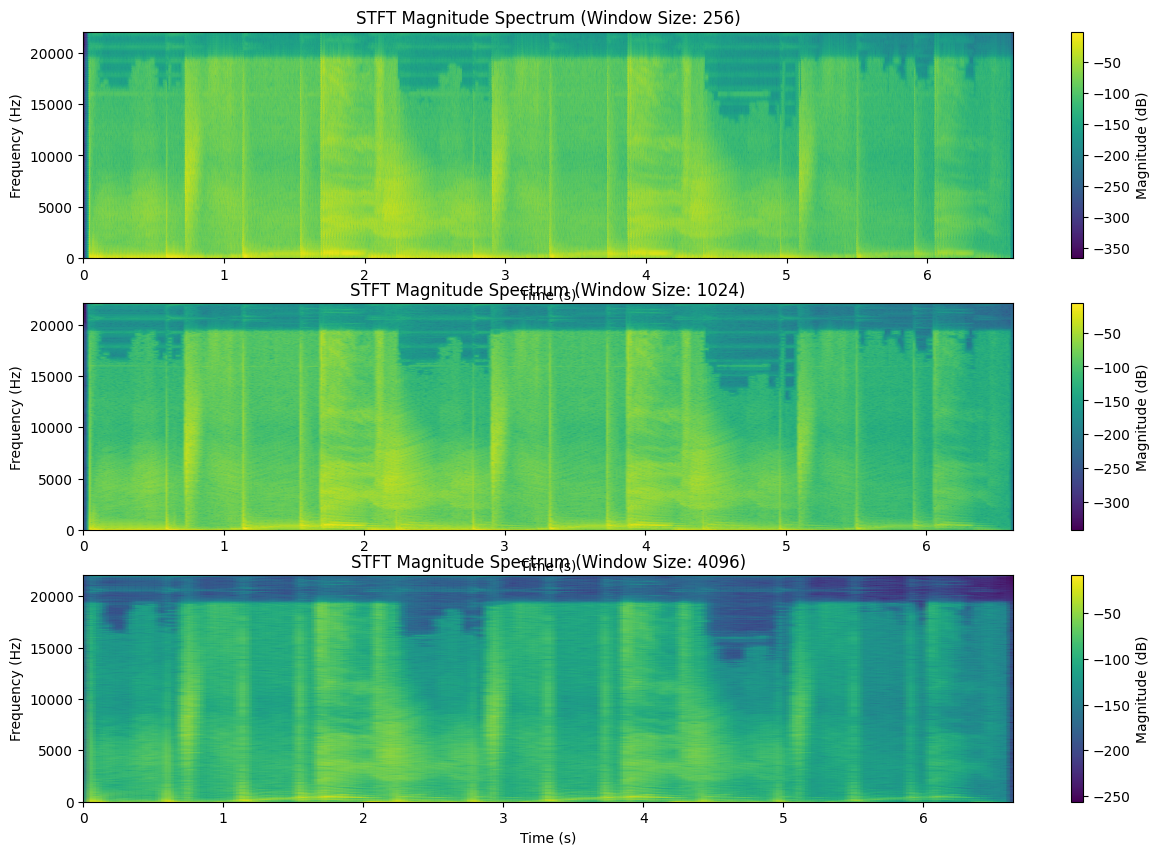

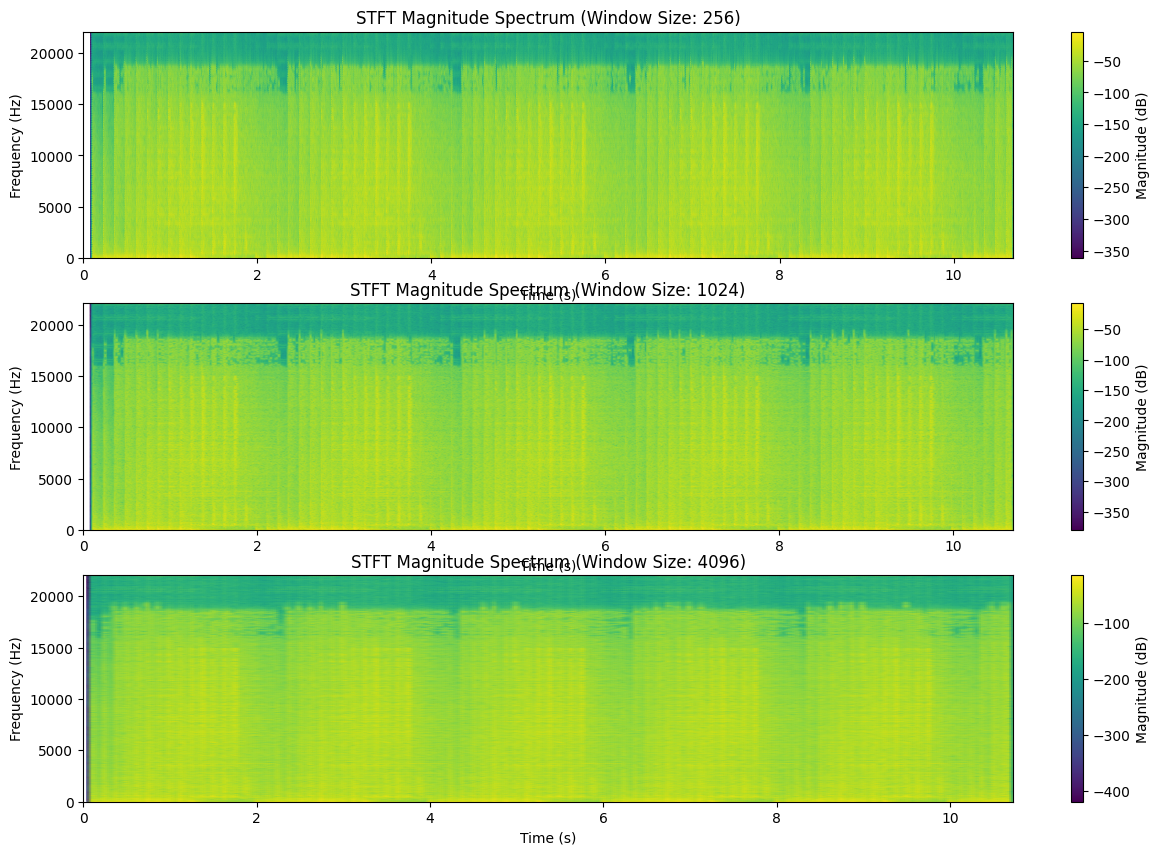

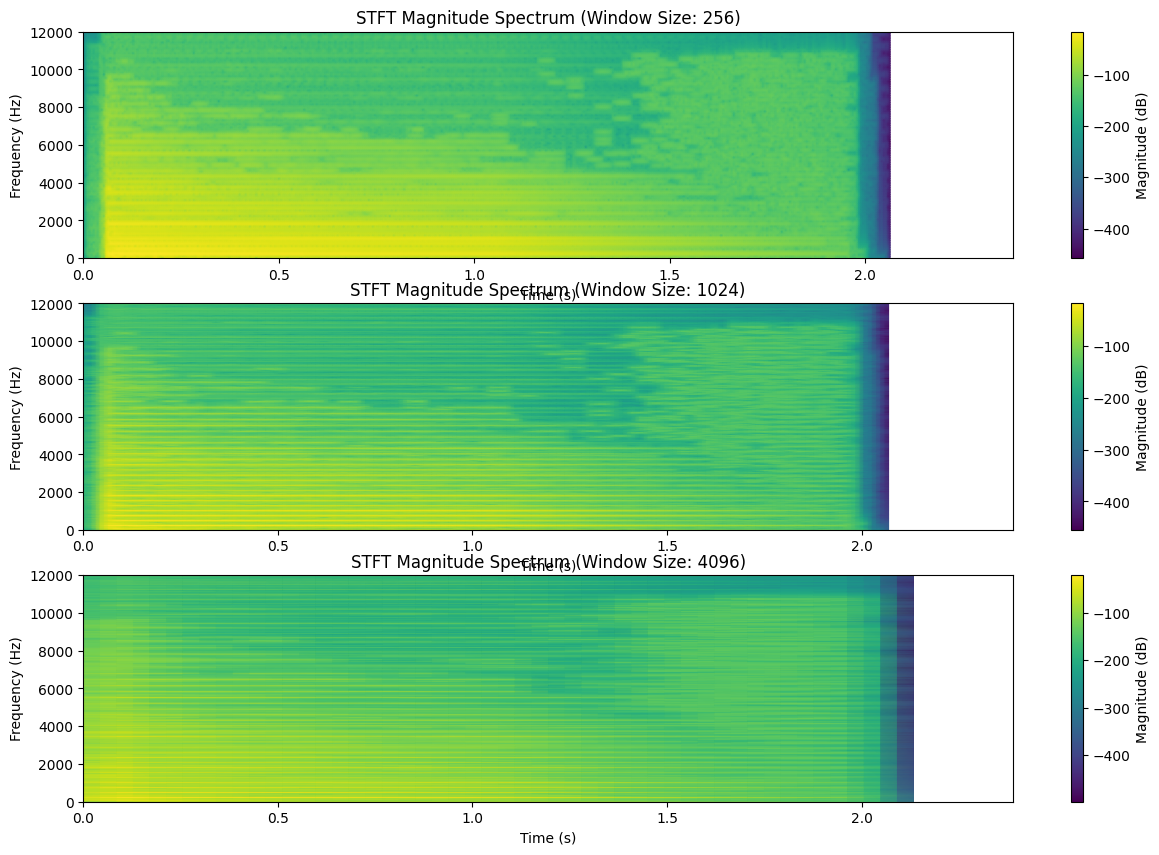

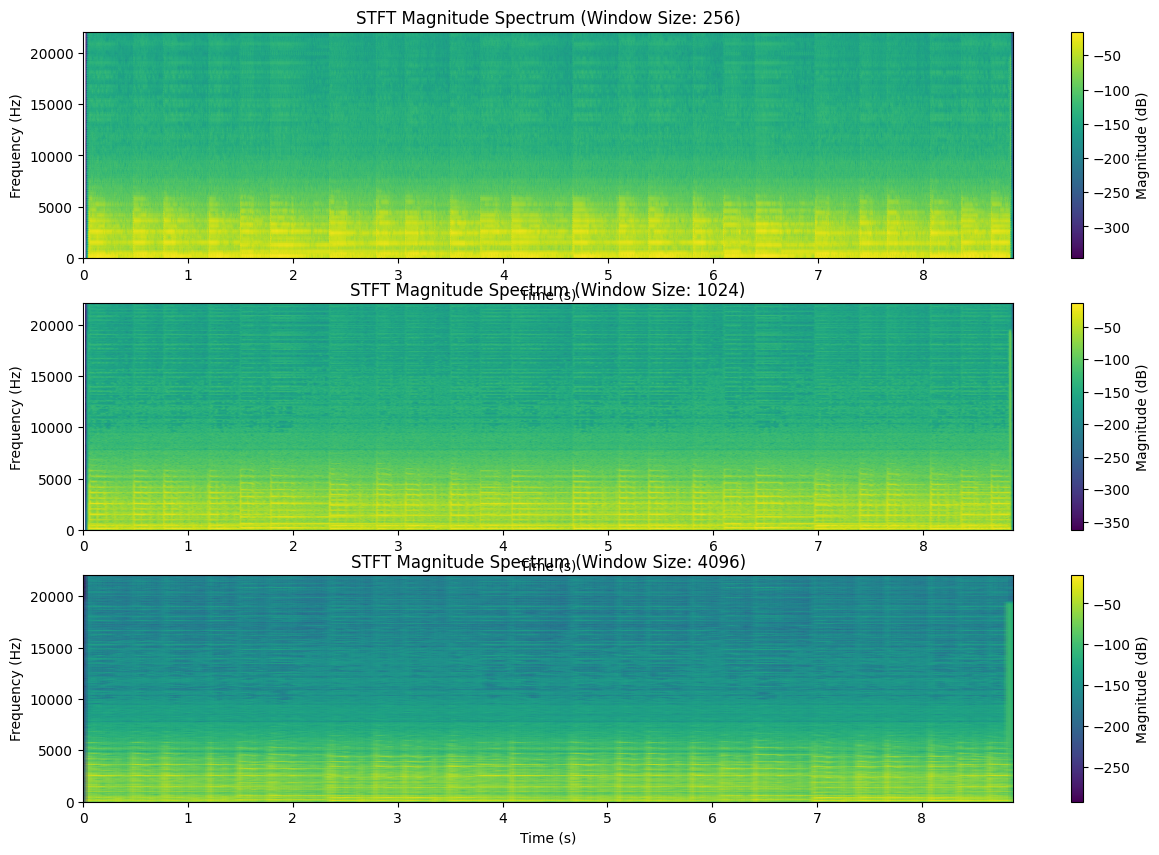

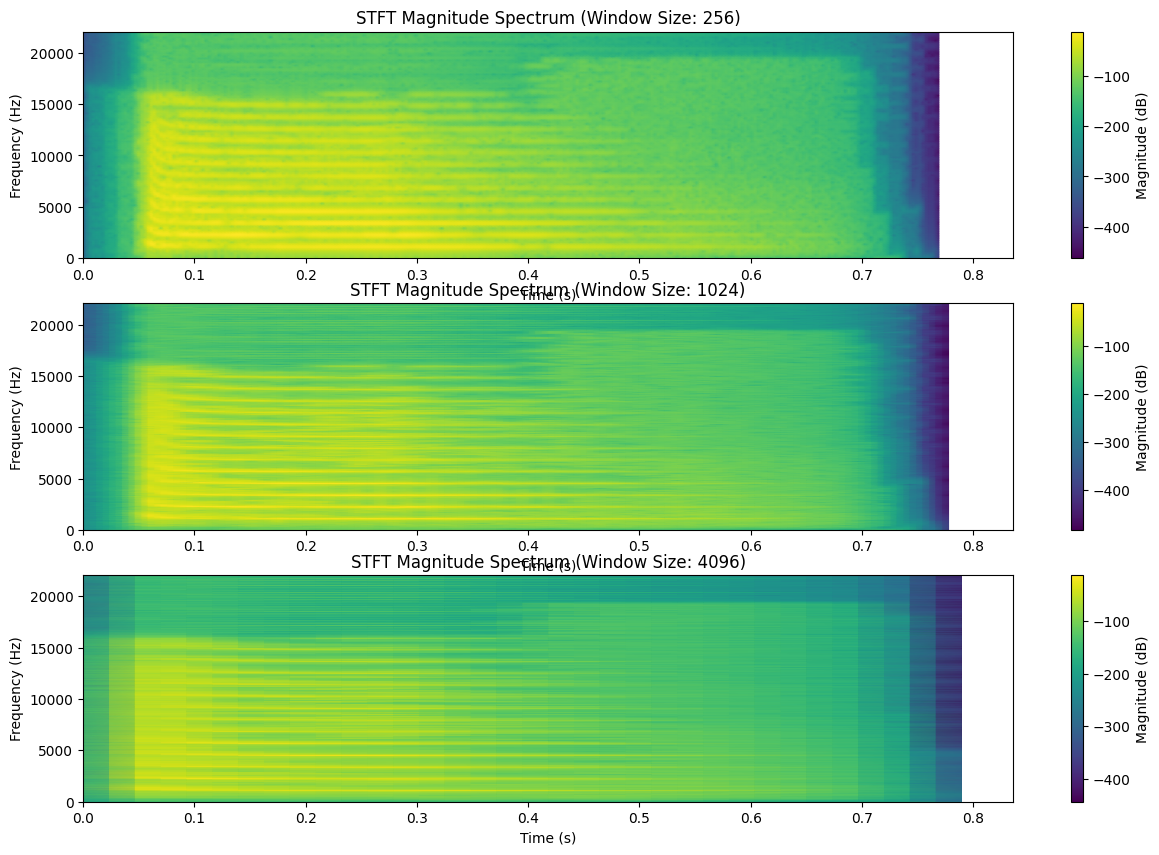

In [27]:
list3=[256,1024,4096]

def plotstft(x,sr,window_sizes):
    plt.figure(figsize=(15, 10))
    for i, window_size in enumerate(window_sizes, 1):
        f, t, Zxx = stft(x, fs=sr, nperseg=window_size)  # Compute STFT

        # Magnitude spectrum
        magnitude = np.abs(Zxx)

         # Plot STFT magnitude
        plt.subplot(len(window_sizes), 1, i)
        plt.pcolormesh(t, f, 20 * np.log10(magnitude), shading='gouraud')  # Log scale for better visualization
        plt.title(f"STFT Magnitude Spectrum (Window Size: {window_size})")
        plt.ylabel("Frequency (Hz)")
        plt.xlabel("Time (s)")
        plt.colorbar(label="Magnitude (dB)")

plt.tight_layout()
plt.show()

for i in range(len(list1)):
    x=list1[i]
    sr=list2[i]
    plotstft(x,sr,list3)


# Spectrogram Visualization

1) Create spectrogram for the audio files uploaded  using librosa.display.specshow.

/var/folders/37/x82lvgr524l4fd08t3g06rl40000gn/T/ipykernel_14292/2335250095.py:2: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(audio_signal), ref=np.max)


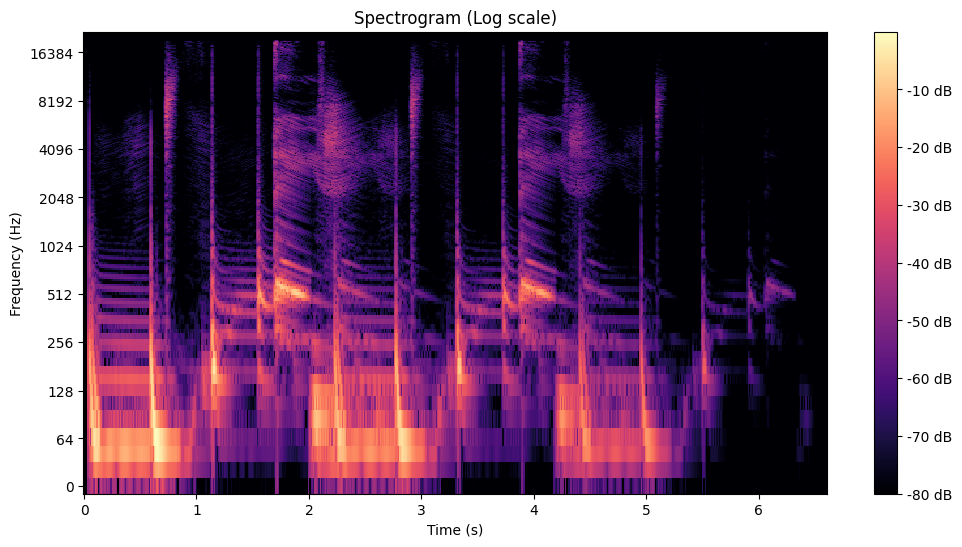

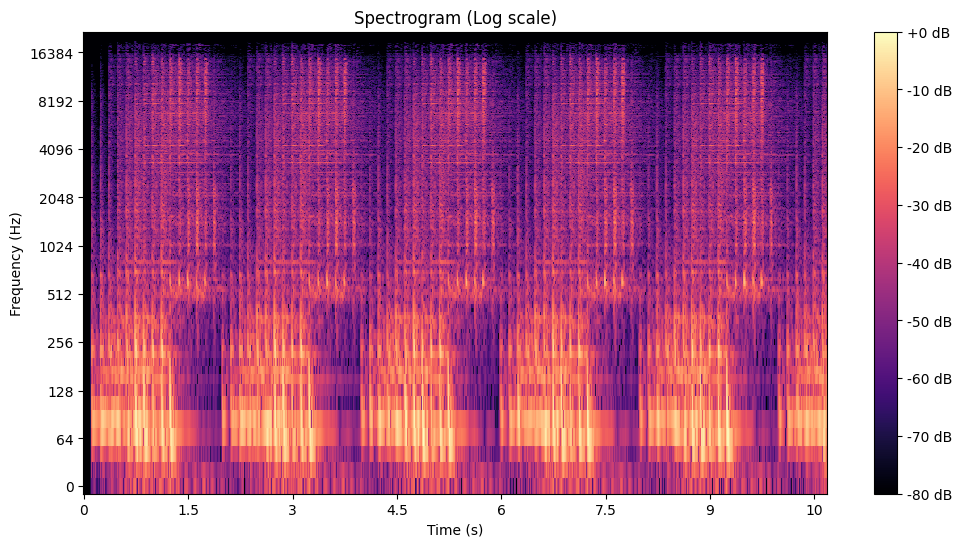

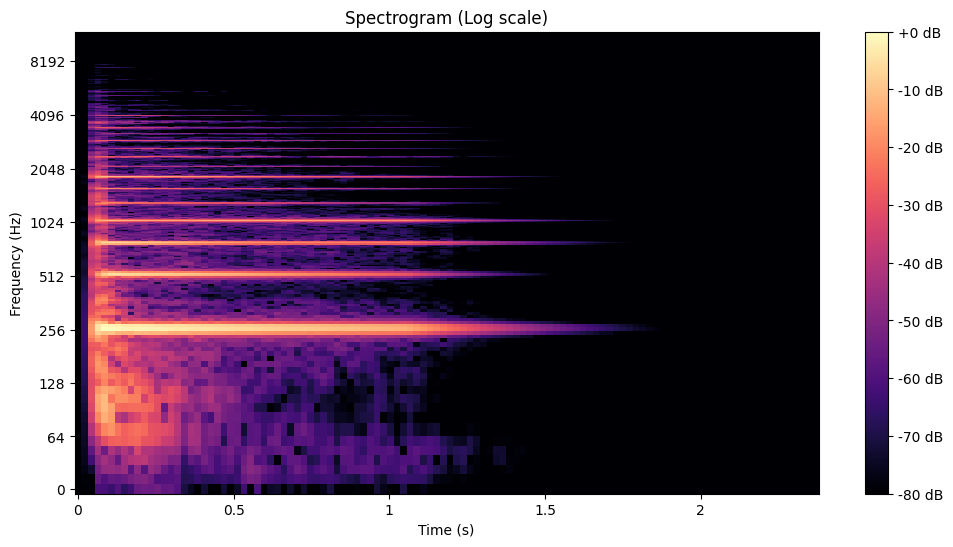

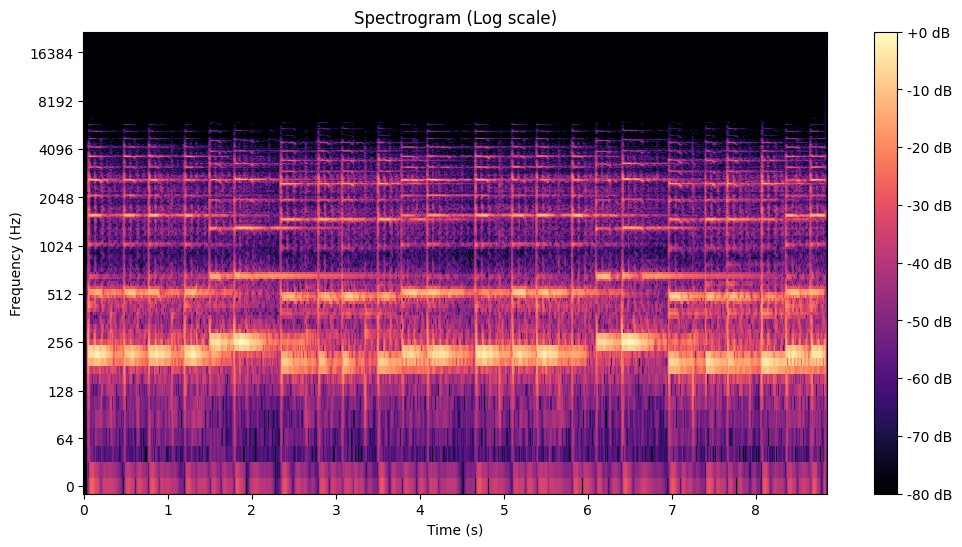

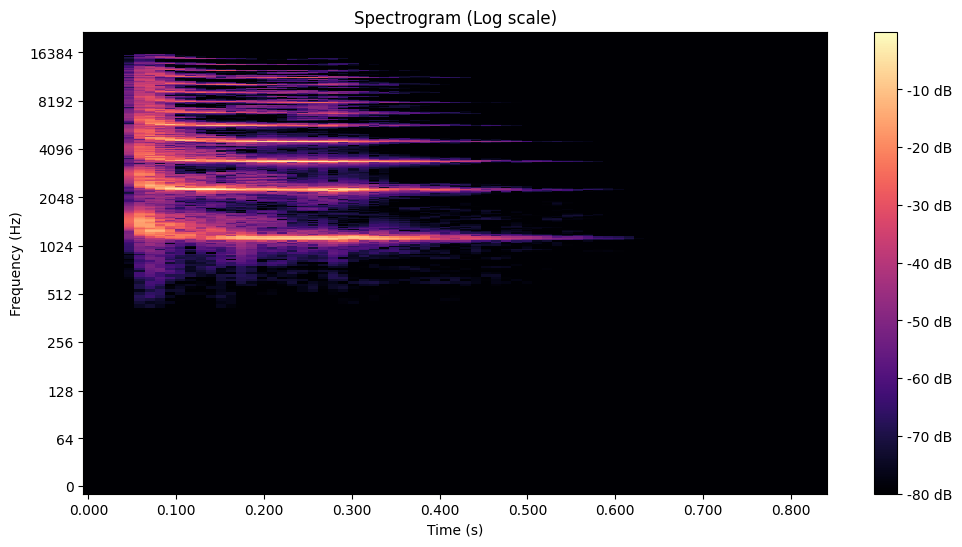

In [28]:
def spectrogram(audio_signal,sr):
    D = librosa.amplitude_to_db(librosa.stft(audio_signal), ref=np.max)
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')  
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram (Log scale)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()
for i in range(len(list1)):
    spectrogram(list1[i],list2[i])

2) Experiment with
logarithmic scaling for frequency and
different color maps for better visualization.

In [29]:
"dont know what to do here??!"

'dont know what to do here??!'

3) Discuss how the spectrogram helps visualize frequency changes over time.

In [30]:
"its an stft meaning it will give idea of time and frequency so computer gets an idea whaat happends when "

'its an stft meaning it will give idea of time and frequency so computer gets an idea whaat happends when '

# Quantization

1) Simulate a 50 Hz sine wave sampled at 1000 Hz.

Text(0.5, 1.0, 'sampling')

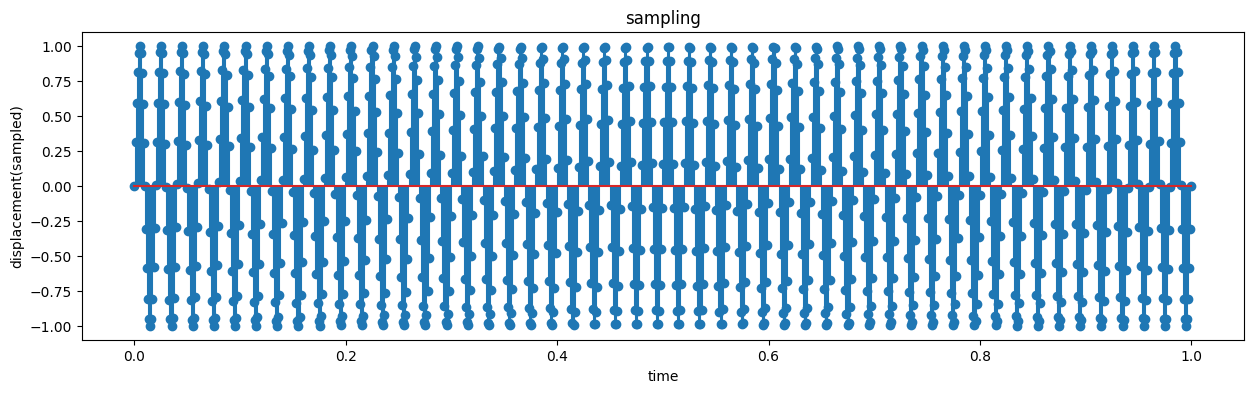

In [31]:
frequency=50
sampling_rate=1000
duration=1
t=np.linspace(0,duration,sampling_rate*duration)
x=np.array(np.sin(2*(np.pi)*(frequency)*(t)))
plt.figure(figsize=(15,4))
plt.stem(t,x)
plt.xlabel("time")
plt.ylabel("displacement(sampled)")
plt.title("sampling")

2) Quantize the signal with different bit depths (e.g., 8-bit, 4-bit).

In [32]:
def quantization(bit,sampled_signal,t):
    step_size=2/(2**bit)
    quantized_signal=np.round(sampled_signal/step_size)*step_size
    return quantized_signal

quantize1=quantization(4,x,t)
quantize2=quantization(8,x,t)


3) Plot and compare
the original signal and the
quantized signals for each bit depth.

In [33]:
def plot(quantized_signal,bit):
    plt.figure(figsize=(15,4))
    plt.step(t,quantized_signal)
    plt.ylabel("displacement(quantized)")
    plt.xlabel("time(s)")
    plt.title(f"quantization({bit}bit)")


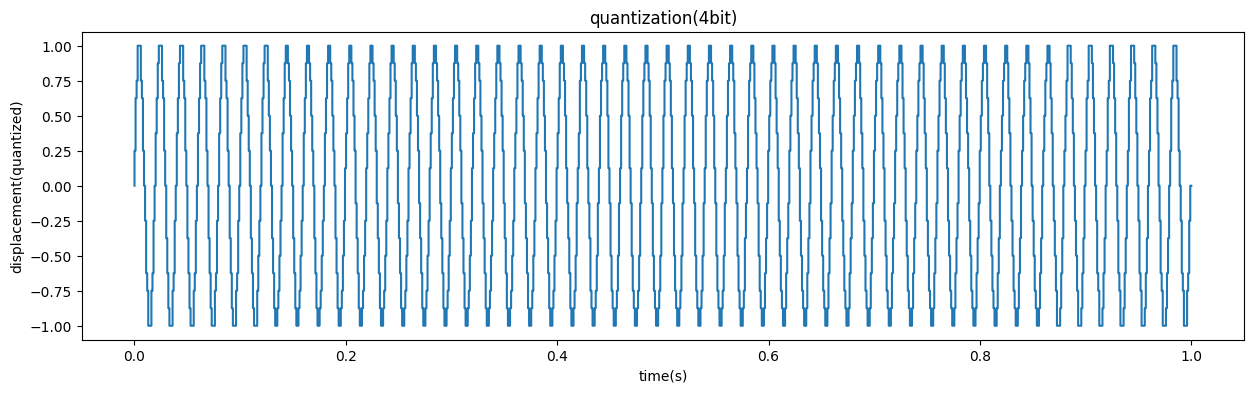

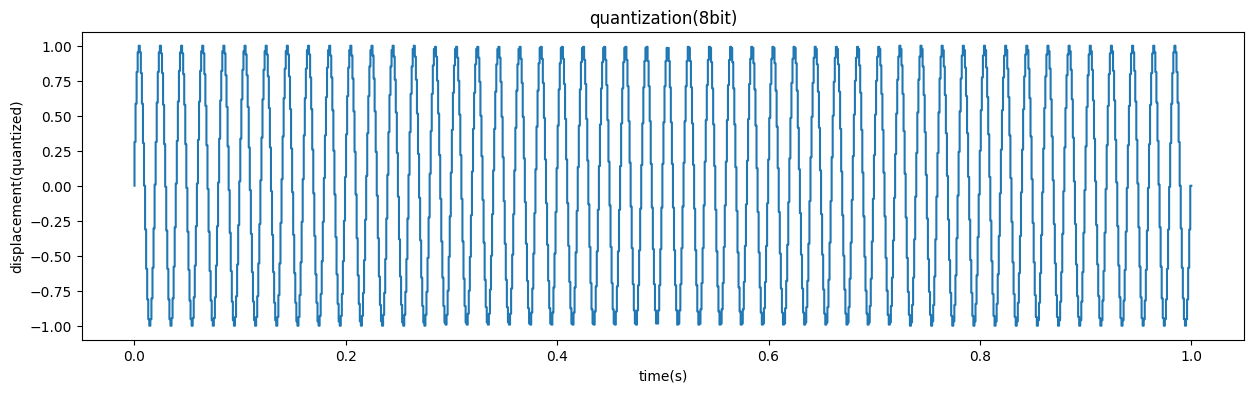

In [34]:

plot(quantize1,4)
plot(quantize2,8)